
You are given the data consisting of various features of houses at an unknown place. You are required to predict the sale price of the data of the houses, you may use MLR(Multi Linear regression) for this task.
> The dataset for this task can be downloaded at: https://drive.google.com/file/d/13ILRFONUoDsxuJdLseTLj3e3sHTxROGU/view?usp=share_link

> Also tell the features which affect the house pricing the most i.e. do some data analysis on the data and do so by the help by various maps like we discussed in the online meet we did. And also try some innovative ideas using the dataset that you may figure out.

> Also here is the column descriptions for the dataset:
* date : Date of transaction
* price : Price of house
* bedrooms, bathrooms : Number
* sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built
* floors : Total floors in the house
* waterfront: Whether the house is on a waterfront(1: yes, 0: no)
* view : special view?
* condition : Condition of the house
* grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow
* sqft_above,sqft_basement : Square footage of house apart from basement and basement area
* yr_built : Built year
* yr_renovated : Year when the house was renovated
* zipcode, lat, long : zip code, latitude and logtitude coordinate of the house
* sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and Understanding Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
path = "/content/drive/MyDrive/ML Applications Project/CSV Files/Training_Data.csv"

housing = pd.read_csv(path)
housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

In [ ]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
housing.dropna(inplace=True)

In [ ]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
for i in range(19998):
  if i not in [10,17]:
    housing["date"][i] = (datetime.now() - pd.to_datetime(housing["date"])[i]).days

Streaming output truncated to the last 5000 lines.
<ipython-input-7-55af04974204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["date"][i] = (datetime.now() - pd.to_datetime(housing["date"])[i]).days
<ipython-input-7-55af04974204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["date"][i] = (datetime.now() - pd.to_datetime(housing["date"])[i]).days
<ipython-input-7-55af04974204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [ ]:
for i in range(19998):
  if i not in [10,17]:
    if housing["yr_renovated"][i] == 0:
      housing["yr_renovated"][i] = housing["yr_built"][i]

<ipython-input-8-a296c52df2f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["yr_renovated"][i] = housing["yr_built"][i]


In [ ]:
housing.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19993,6371000148,3103,439108.0,2,1.50,1130,1340,2.0,0,0,...,8,910.0,220,2008,2008,98116,47.5761,-122.410,1310,1340
19994,301400850,3016,260000.0,3,2.25,1489,2800,2.0,0,0,...,7,1489.0,0,2011,2011,98002,47.3452,-122.215,1584,3200
19995,1123049232,3275,279000.0,5,2.50,2690,5557,2.0,0,0,...,7,2690.0,0,2012,2012,98178,47.4914,-122.253,2090,10500
19996,3654200037,2978,380000.0,3,2.25,1530,1305,2.0,0,0,...,7,1116.0,414,2007,2007,98177,47.7034,-122.357,1320,1427
19997,7299601790,3121,287000.0,3,2.50,1600,6315,2.0,0,0,...,8,1600.0,0,2013,2013,98092,47.2611,-122.198,1608,4300


# Data Inspection

In [ ]:
housing.shape

(19996, 21)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19996 entries, 0 to 19997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19996 non-null  int64  
 1   date           19996 non-null  object 
 2   price          19996 non-null  float64
 3   bedrooms       19996 non-null  int64  
 4   bathrooms      19996 non-null  float64
 5   sqft_living    19996 non-null  int64  
 6   sqft_lot       19996 non-null  int64  
 7   floors         19996 non-null  float64
 8   waterfront     19996 non-null  int64  
 9   view           19996 non-null  int64  
 10  condition      19996 non-null  int64  
 11  grade          19996 non-null  int64  
 12  sqft_above     19996 non-null  float64
 13  sqft_basement  19996 non-null  int64  
 14  yr_built       19996 non-null  int64  
 15  yr_renovated   19996 non-null  int64  
 16  zipcode        19996 non-null  int64  
 17  lat            19996 non-null  float64
 18  long  

In [ ]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.999600e+04,1.999600e+04,19996.000000,19996.000000,19996.000000,1.999600e+04,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000
mean,4.569328e+09,5.355663e+05,3.364473,2.072002,2057.888578,1.560857e+04,1.444864,0.007952,0.241798,3.441788,7.605771,1757.482697,300.405881,1967.955491,1970.521004,98078.158382,47.560372,-122.215140,1974.326715,13117.607021
std,2.866398e+09,3.662173e+05,0.933758,0.762367,905.612990,4.177411e+04,0.516686,0.088819,0.777976,0.665487,1.172693,811.651623,447.541057,28.315947,27.947703,54.040996,0.139327,0.139577,675.290733,26945.103272
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.170000e+05,3.000000,1.500000,1420.000000,5.350000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,1953.000000,98033.000000,47.467400,-122.327000,1490.000000,5350.000000
50%,3.905081e+09,4.499250e+05,3.000000,2.000000,1900.000000,7.819000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,1975.000000,98065.000000,47.572900,-122.232000,1830.000000,7779.000000
75%,7.300400e+09,6.400000e+05,4.000000,2.500000,2510.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,590.000000,1991.000000,1994.000000,98118.000000,47.679000,-122.127000,2340.000000,10240.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Exploratory Data Analytics

<ipython-input-14-ce79336972df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr())


<Axes: >

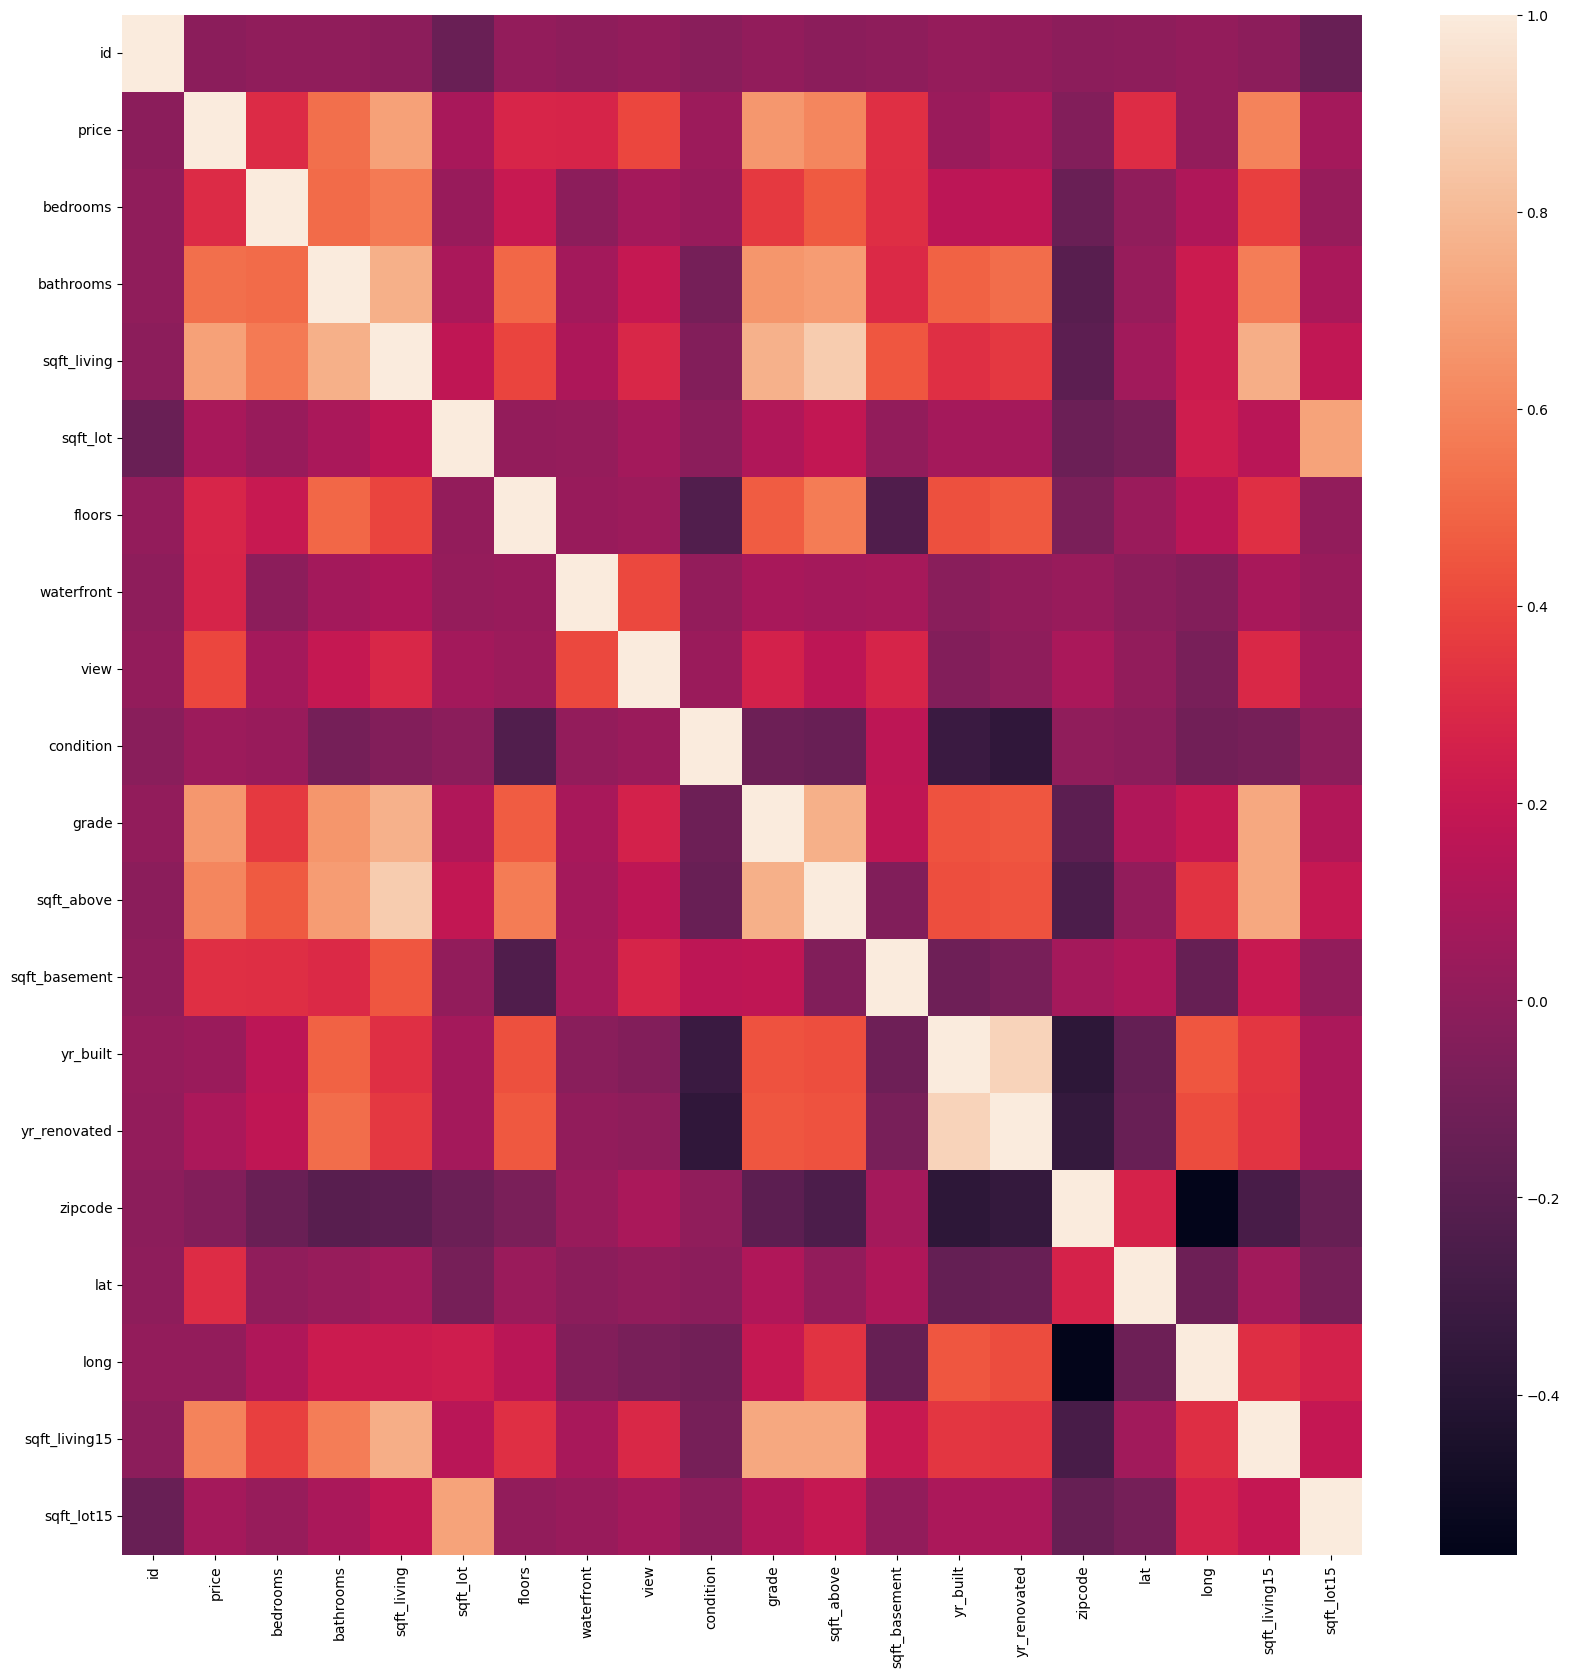

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(housing.corr())

# Splitting Data

In [ ]:
X = housing[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = housing["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)

# Building Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
lr.coef_

array([-1.09761557e+02, -2.45264003e+04,  3.32399605e+04,  9.05372596e+01,
        9.98790946e-02,  8.12216747e+03,  5.57456888e+05,  5.20302121e+04,
        2.87192959e+04,  1.01355368e+05,  6.33431785e+01,  2.71940811e+01,
       -3.12934278e+03,  3.55551524e+02, -5.84909339e+02,  5.84443523e+05,
       -1.87459537e+05,  3.98425853e+01, -3.65087847e-01])

In [ ]:
y_test.shape

(11998,)

In [ ]:
y_pred.shape

(11998,)

In [ ]:
num = [i for i in range(0,11998)]

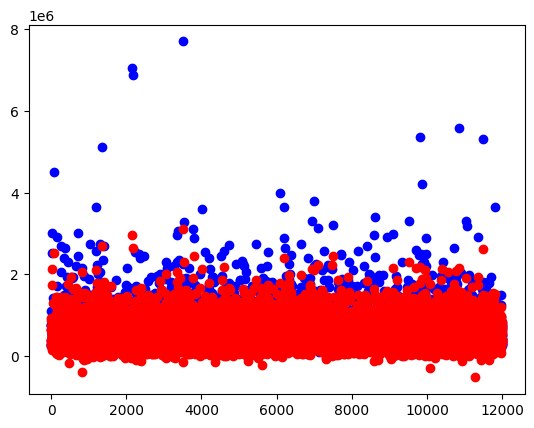

In [ ]:
plt.scatter(num, y_test, color="blue")
plt.scatter(num, y_pred, color="red")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 43362120697.26898
r_square_value : 0.6967919866302339


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_poly,y_train)

X_poly_test = pf.fit_transform(X_test)
y_pred = lr.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 25671108458.9223
r_square_value : 0.8204957305669818


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=5, include_bias=False)
X_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_poly,y_train)

X_poly_test = pf.fit_transform(X_test)
y_pred = lr.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)